# Heart Disease Dataset



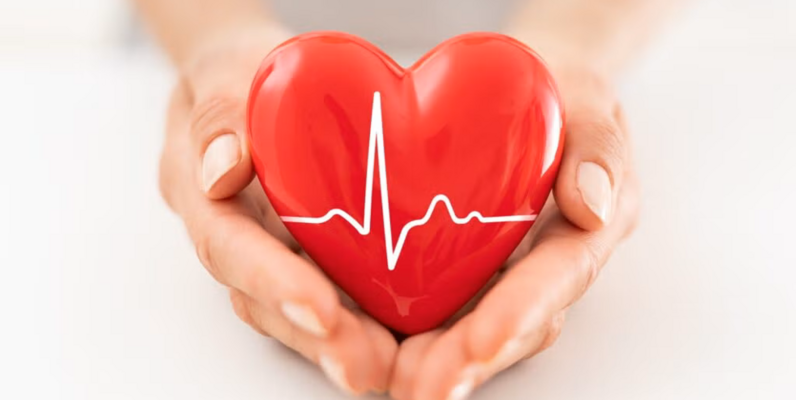

In [47]:
# Importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [48]:
# Importando as bibliotecas de machine learning

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier




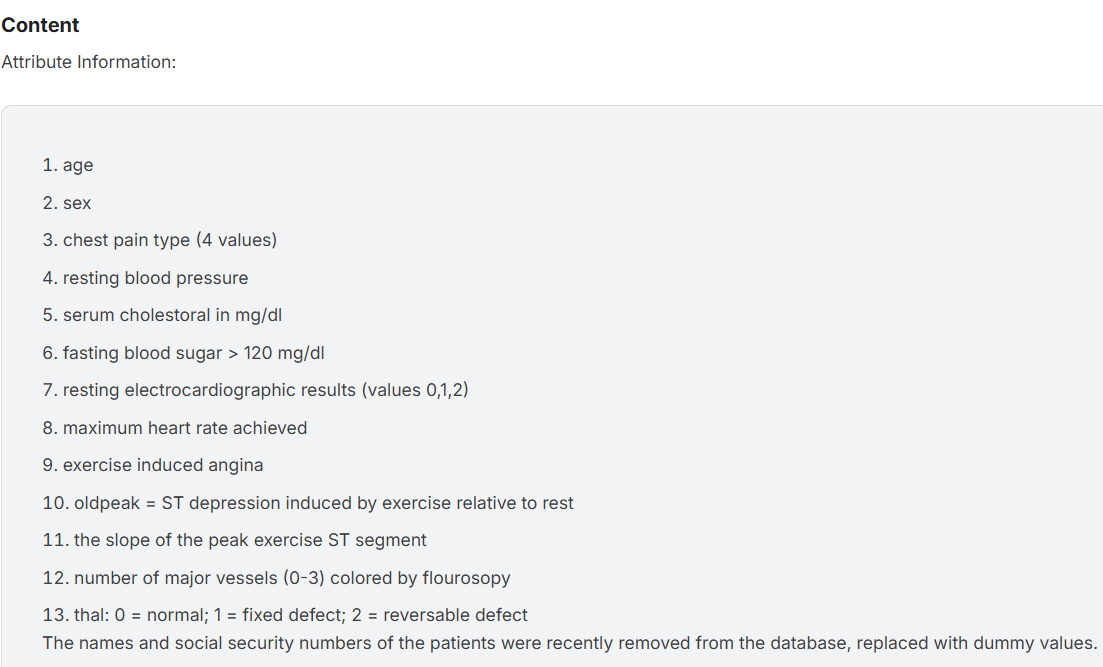

In [49]:
# Carregando os dados

df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [50]:
# Visualizando os dados

df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [51]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [52]:
df.shape

(1025, 14)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [54]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [55]:
## Renomeando algumas colunas, facilitando a interpretação

df.rename(columns={'age': 'idade', 'sex': 'genero', 'chol': 'colesterol'}, inplace=True)

In [56]:
# Verificando linhas duplicadas

df.duplicated().sum()

723

In [57]:
# Excluindo linhas duplicadas

df = df.drop_duplicates()
df

,idade,genero,cp,trestbps,colesterol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [58]:
df.describe()

,idade,genero,cp,trestbps,colesterol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Criando um gráfico para visualizar a correlação entre colunas

<AxesSubplot:>

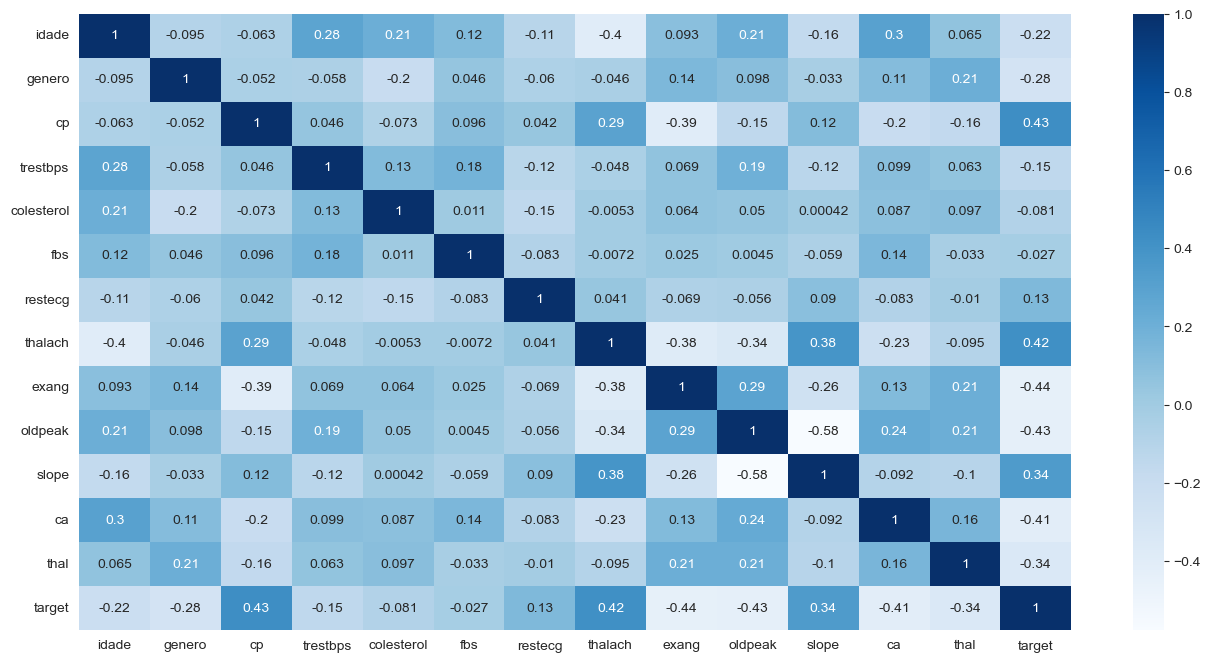

In [59]:
plt.figure(figsize = (16, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

In [60]:
categoricas = ['genero', 'cp',' fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

numericas = ['idade', 'trestbps', 'colesterol', 'thalach', 'oldpeak']

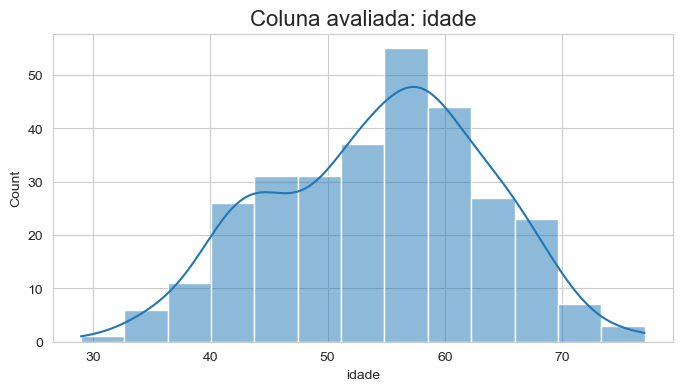

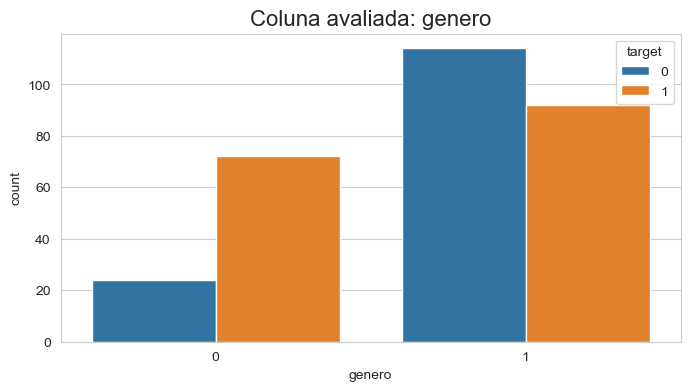

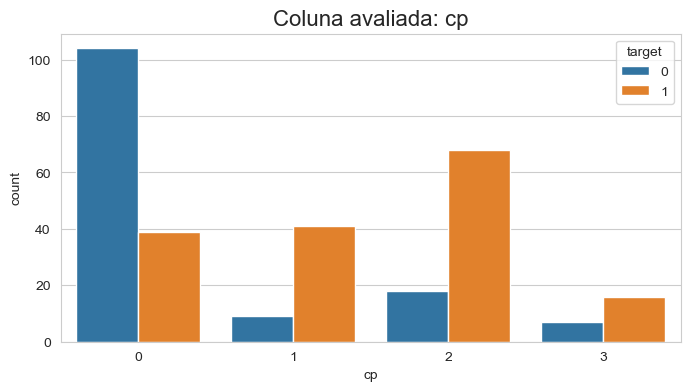

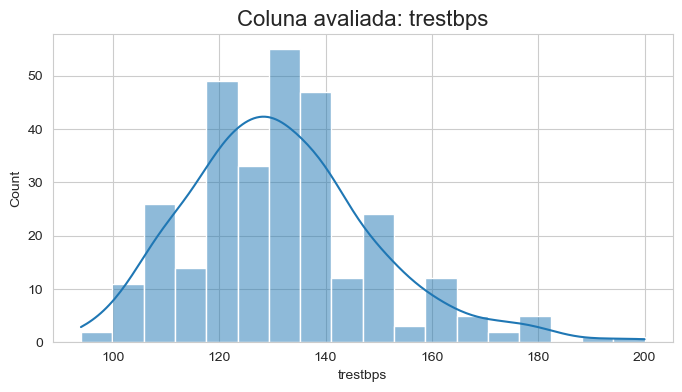

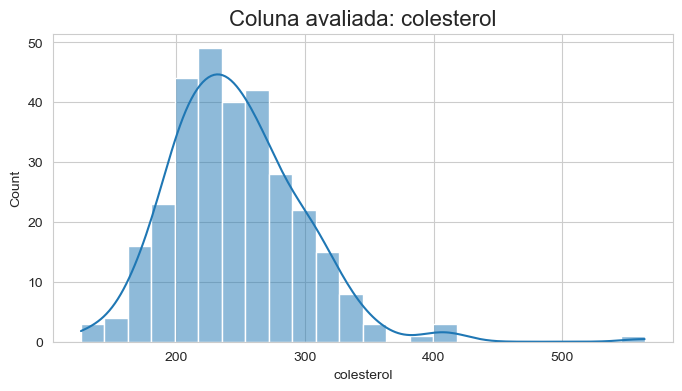

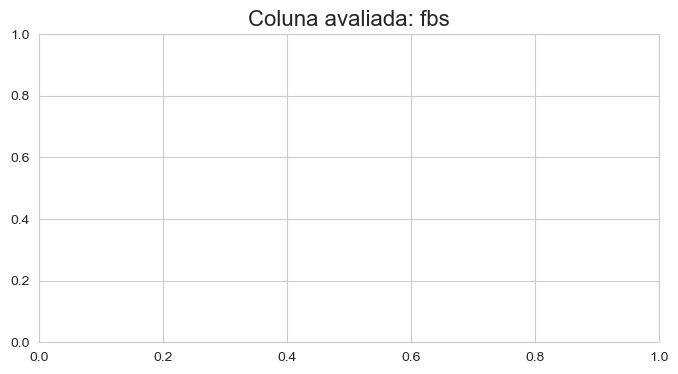

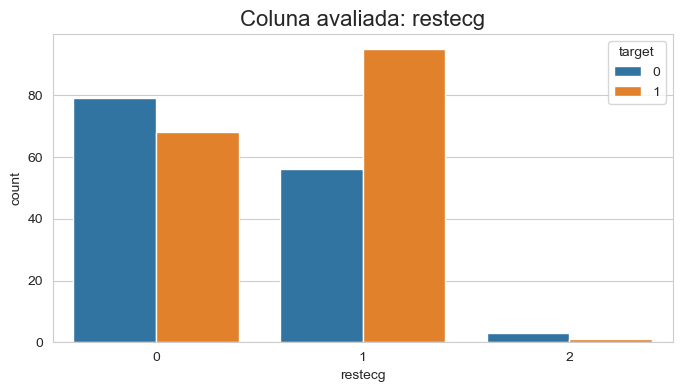

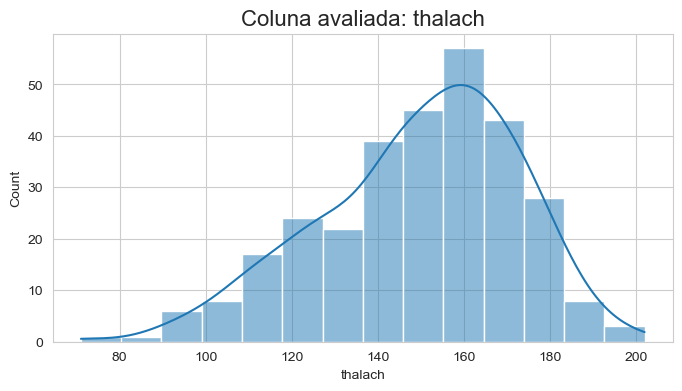

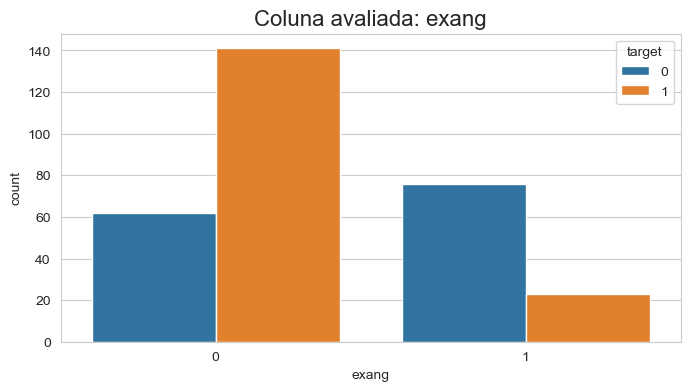

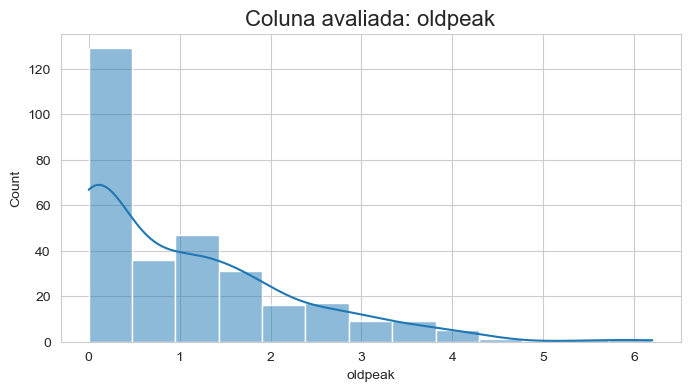

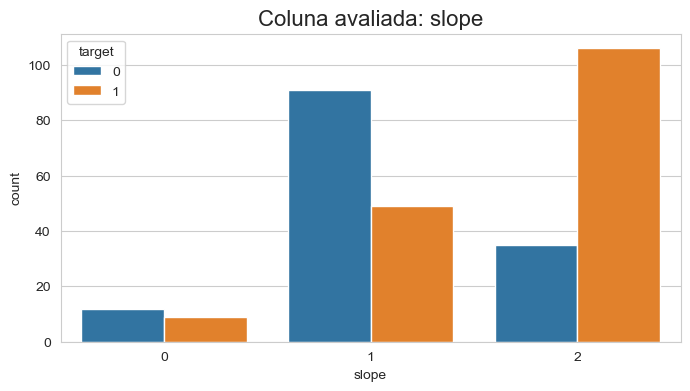

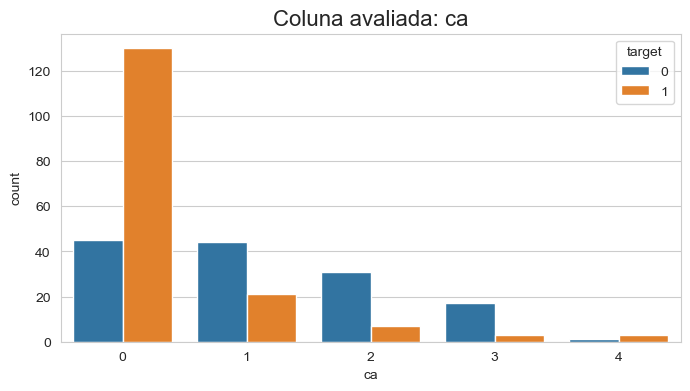

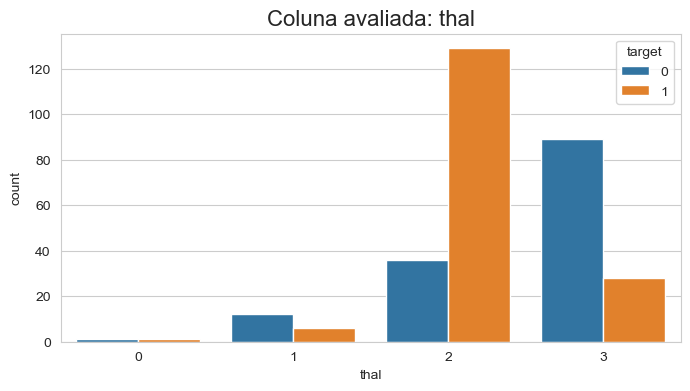

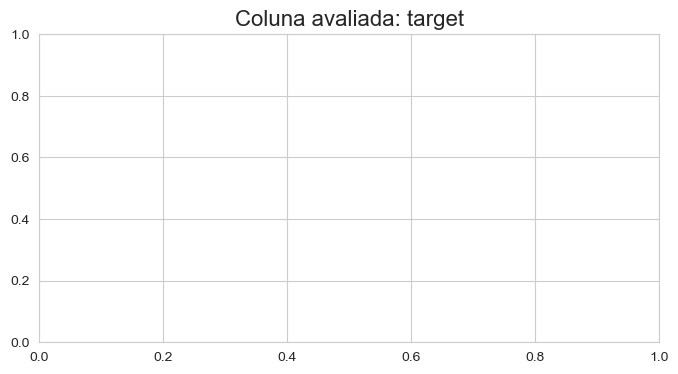

In [61]:
for c in df.columns:
    plt.figure(figsize = (8, 4))
    plt.title(f"Coluna avaliada: {c}", fontsize = 16)
    if c in categoricas:
        sns.countplot(x = df[c], hue = df['target'])
    if c in numericas:
        sns.histplot(df[c], kde = True)

## Removendo Outliers

<AxesSubplot:>

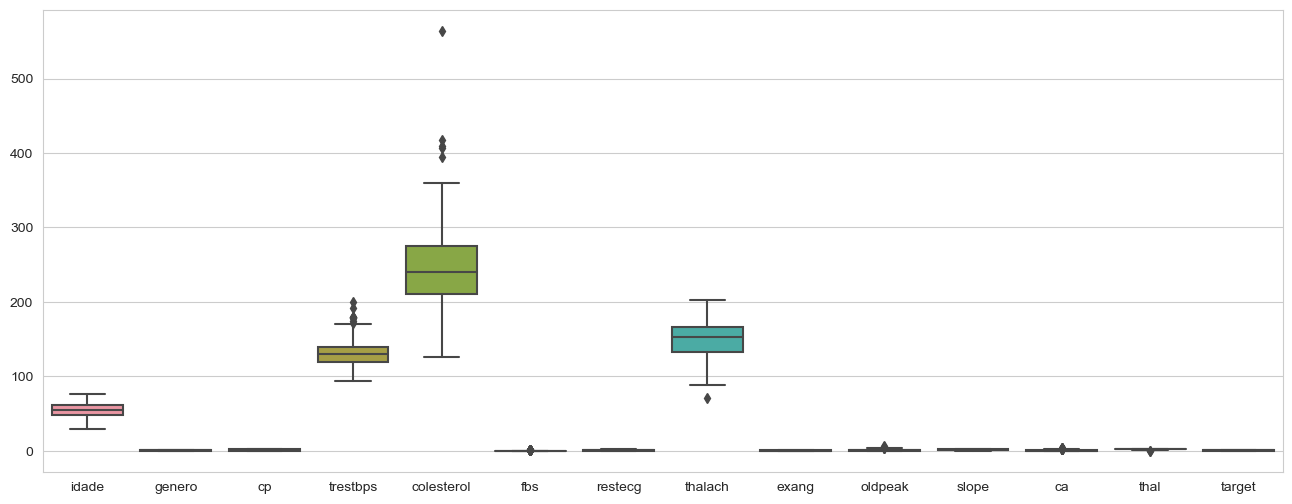

In [62]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = df )

In [63]:
df.describe()

,idade,genero,cp,trestbps,colesterol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [64]:
df['trestbps'].quantile(0.99)

180.0

In [65]:
df1 = df[df['trestbps'] < df['trestbps'].quantile (0.99)]

<AxesSubplot:>

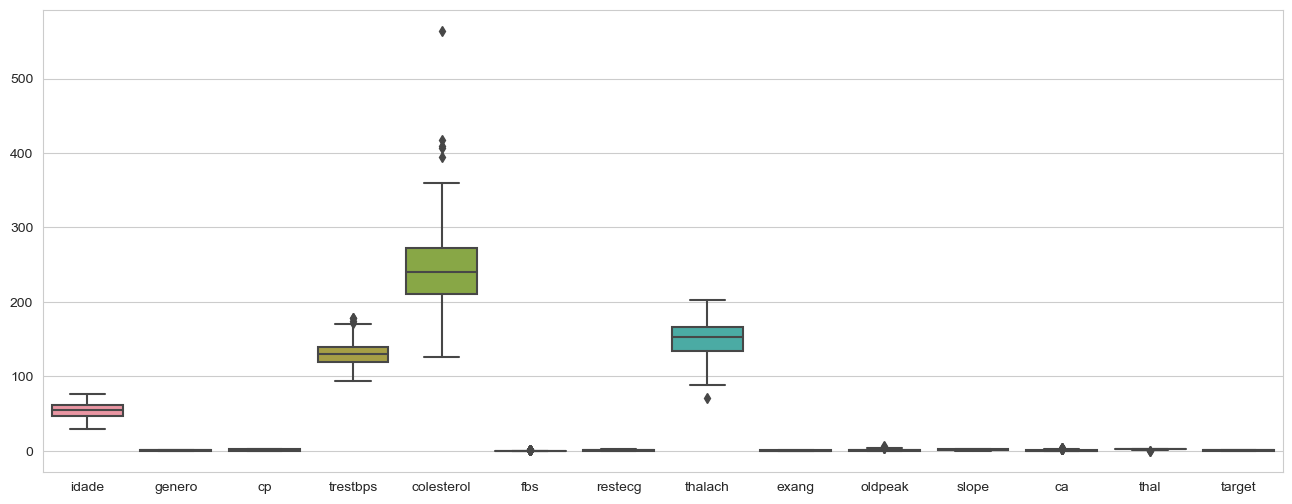

In [66]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = df1)

In [67]:
df1.describe()

,idade,genero,cp,trestbps,colesterol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.336700,0.686869,0.969697,130.680135,245.609428,0.144781,0.525253,149.565657,0.319865,1.030303,1.400673,0.720539,2.309764,0.548822
std,9.071847,0.464550,1.034420,16.154304,51.645776,0.352474,0.520072,22.844729,0.467211,1.146686,0.613254,1.009758,0.613755,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [68]:
df1['colesterol'].quantile(0.98)

354.4799999999999

In [69]:
df2 = df1[df1['colesterol'] < df1['colesterol'].quantile (0.98)]

<AxesSubplot:>

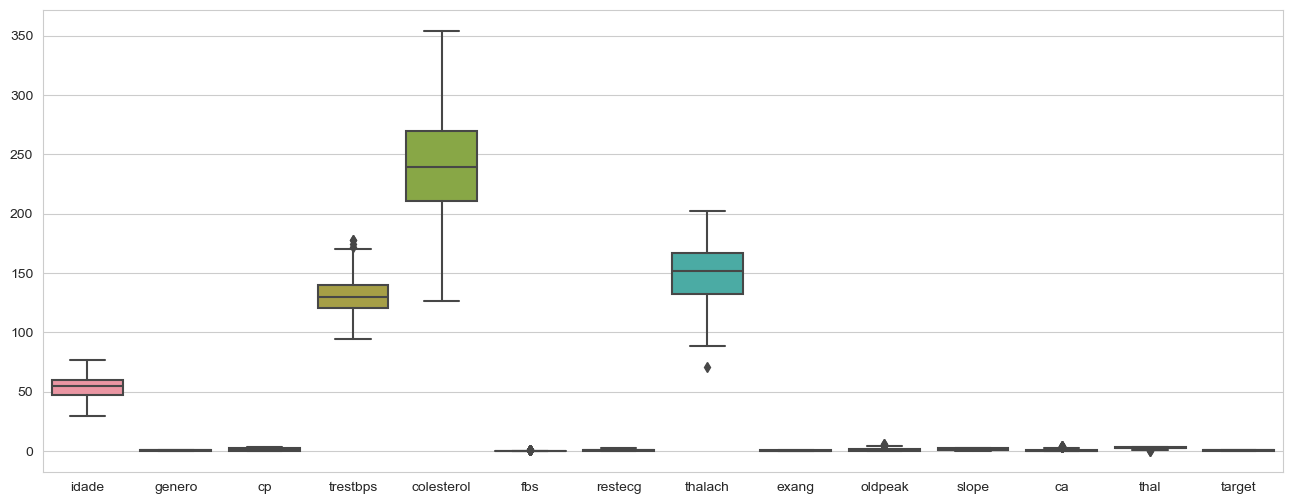

In [70]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = df2)

In [71]:
df2.describe()

,idade,genero,cp,trestbps,colesterol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,54.158076,0.701031,0.969072,130.491409,241.907216,0.144330,0.536082,149.457045,0.323024,1.016151,1.402062,0.714777,2.305842,0.546392
std,9.064278,0.458595,1.035111,16.142761,44.214699,0.352029,0.519851,23.061553,0.468437,1.143368,0.615766,1.005719,0.615266,0.498701
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,166.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [72]:
df2['thalach'].quantile(0.005)

88.9

In [73]:
df3 = df2[df2['thalach'] > df2['thalach'].quantile(0.05)]

<AxesSubplot:>

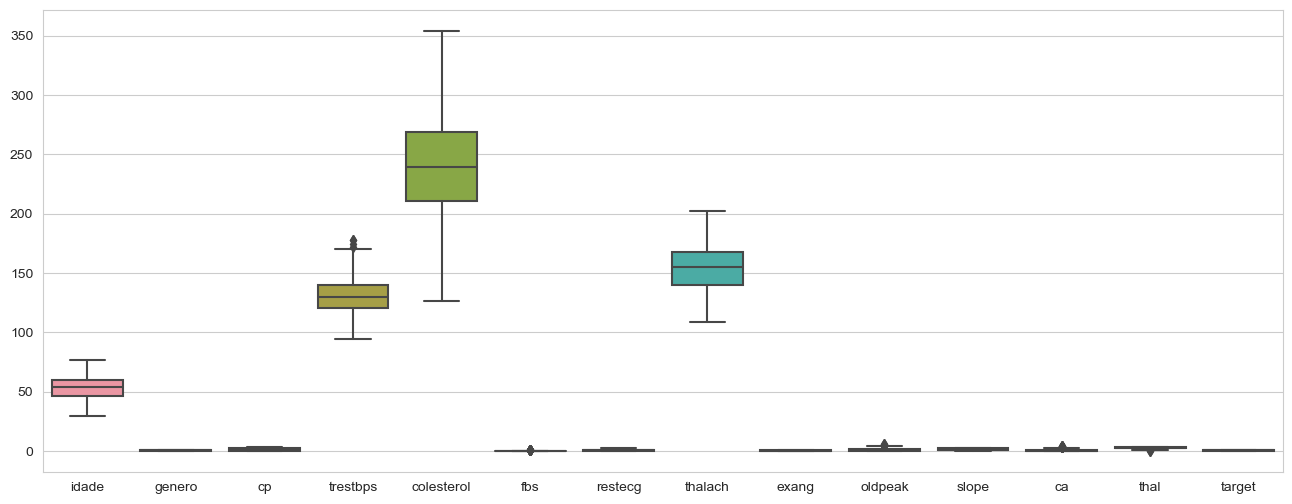

In [74]:
plt.figure(figsize = (16, 6))
sns.boxplot(data = df3)

In [75]:
df3.describe()

,idade,genero,cp,trestbps,colesterol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,53.807273,0.694545,1.007273,130.400000,241.661818,0.138182,0.534545,152.425455,0.309091,0.998545,1.429091,0.683636,2.301818,0.570909
std,9.148967,0.461439,1.039345,16.185512,44.443089,0.345720,0.521165,19.926070,0.462961,1.161423,0.614209,1.002690,0.609981,0.495849
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,109.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,140.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,155.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Aplicando o método "get_dummies" para categorizar os dados

In [76]:
categoricas = ['genero', 'cp',' fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

numericas = ['idade', 'trestbps', 'colesterol', 'thalach', 'oldpeak']

In [81]:
df4 = pd.get_dummies(df3, columns = ['genero', 'cp','fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first = True)

In [82]:
df4

,idade,trestbps,colesterol,thalach,oldpeak,target,genero_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,140,203,155,3.1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5,58,100,248,122,1.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
733,44,108,141,175,0.6,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
739,52,128,255,161,0.0,0,1,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,59,160,273,125,0.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0


## Aplicando os modelos de treino e teste

In [113]:
X = df4.drop('target', axis = 1)
y = df4['target']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = (0.2), random_state=42)

In [120]:
# Importando o logistic regression

log = LogisticRegression(max_iter=1000)

In [121]:
log.fit(X_train, y_train)

C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [122]:
# Verificando a acurácia dos dados de treino

log.score(X_train, y_train)

0.8454545454545455

In [123]:
# Verificando a acurácia dos dados de test

log.score(X_test, y_test)

0.8727272727272727

In [124]:
y_previsto = log.predict(X_test)

In [125]:
accuracy_score(y_test, y_previsto)

0.8727272727272727

In [127]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        23
           1       0.88      0.91      0.89        32

    accuracy                           0.87        55
   macro avg       0.87      0.87      0.87        55
weighted avg       0.87      0.87      0.87        55



In [128]:
confusion_matrix(y_test, y_previsto)

array([[19,  4],
       [ 3, 29]], dtype=int64)

In [129]:
# Criando uma função para facilitar a aplicação nos demais modelos de machine learning

def relatorio_ml(df, algoritmo, opt = 2):
    X = df.drop('target', axis = 1)
    y = df['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = (0.2), random_state=42)
    
    if opt == 0:
        ml = algoritmo(max_iter = 1000)
    elif opt == 1:
        ml = algoritmo(n_estimators = 1000)
    elif opt == 2:
        ml = algoritmo()
        
    ml.fit(X_train, y_train)
    score_train = ml.score(X_train, y_train)
    print(f"Acurácia treino: {score_train * 100:.2f}%")
    score_test = ml.score(X_test, y_test)
    print(f"Acurácia teste: {score_test * 100:.2f}%")
    
    y_previsto = log.predict(X_test)
    print("--- CLASSIFICATION REPORT ---")
    print(classification_report(y_test, y_previsto))
    print("--- CONFUSION MATRIX ---")
    confusao = confusion_matrix(y_test, y_previsto)
    sns.heatmap(confusao, annot = True, cmap = 'Blues')
    
    return score_train, score_test

C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia treino: 84.55%
Acurácia teste: 87.27%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        23
           1       0.88      0.91      0.89        32

    accuracy                           0.87        55
   macro avg       0.87      0.87      0.87        55
weighted avg       0.87      0.87      0.87        55

--- CONFUSION MATRIX ---


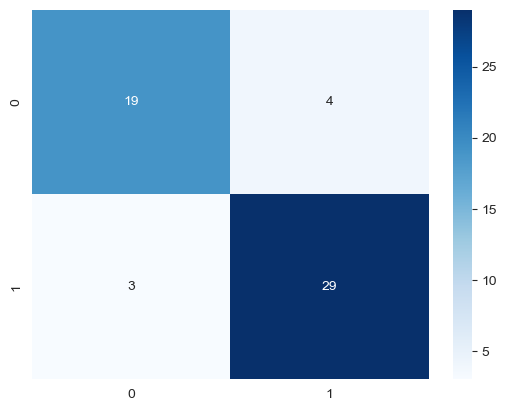

In [130]:
log_train, log_test = relatorio_ml(df4, LogisticRegression, opt = 0)

Acurácia treino: 100.00%
Acurácia teste: 78.18%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        23
           1       0.88      0.91      0.89        32

    accuracy                           0.87        55
   macro avg       0.87      0.87      0.87        55
weighted avg       0.87      0.87      0.87        55

--- CONFUSION MATRIX ---


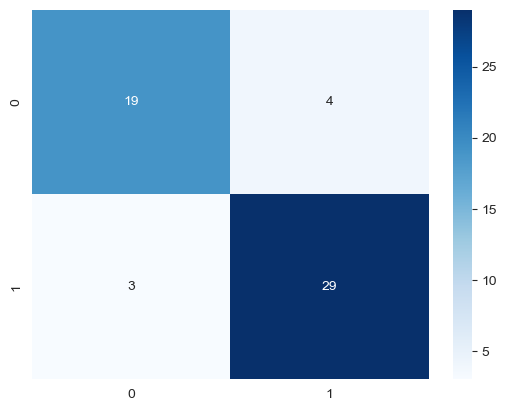

In [131]:
tree_train, tree_test = relatorio_ml(df4, DecisionTreeClassifier)

Acurácia treino: 95.00%
Acurácia teste: 83.64%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        23
           1       0.88      0.91      0.89        32

    accuracy                           0.87        55
   macro avg       0.87      0.87      0.87        55
weighted avg       0.87      0.87      0.87        55

--- CONFUSION MATRIX ---


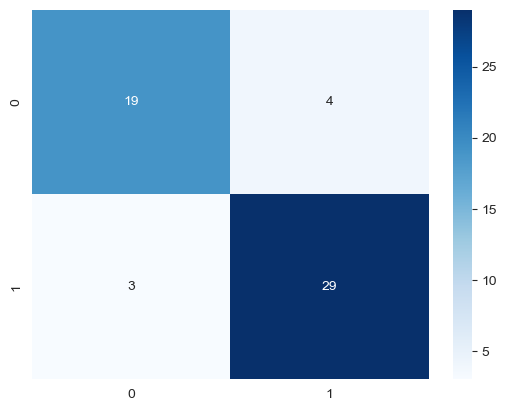

In [132]:
ada_train, ada_test = relatorio_ml(df4, AdaBoostClassifier)

C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Acurácia treino: 75.91%
Acurácia teste: 69.09%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        23
           1       0.88      0.91      0.89        32

    accuracy                           0.87        55
   macro avg       0.87      0.87      0.87        55
weighted avg       0.87      0.87      0.87        55

--- CONFUSION MATRIX ---


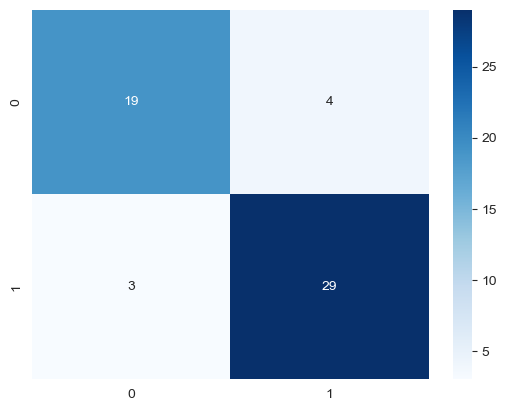

In [133]:
kn_train, kn_test = relatorio_ml(df4, KNeighborsClassifier)

Acurácia treino: 100.00%
Acurácia teste: 81.82%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        23
           1       0.88      0.91      0.89        32

    accuracy                           0.87        55
   macro avg       0.87      0.87      0.87        55
weighted avg       0.87      0.87      0.87        55

--- CONFUSION MATRIX ---


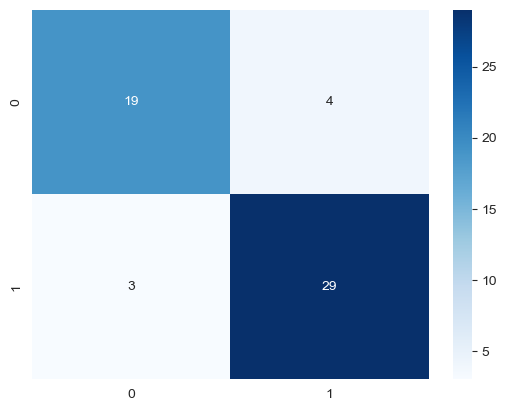

In [134]:
rand_train, rand_test = relatorio_ml(df4, RandomForestClassifier)

## Classificando os modelos de Machine Learning, com maior índice de acurácia

In [135]:
data = { 'Models' : ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'Random Forest Classifier', 'Ada Boost'],
         'Acurácia Treino' : [round(log_train * 100, 2), round(tree_train * 100, 2), round(kn_train * 100, 2),
                              round(rand_train *100, 2), round(ada_train * 100, 2)],
       
         'Acurácia Teste': [round(log_test * 100, 2), round(tree_test * 100, 2), round(kn_test * 100, 2),
                           round(rand_test * 100, 2), round(ada_test * 100, 2)],
 
     }

df = pd.DataFrame(data)
df.sort_values(by='Acurácia Teste', ascending=False, inplace = True)
df

,Models,Acurácia Treino,Acurácia Teste
0,Logistic Regression,84.55,87.27
4,Ada Boost,95.00,83.64
3,Random Forest Classifier,100.00,81.82
1,Decision Tree,100.00,78.18
2,KNeighbors,75.91,69.09
